## MORPHOLOGICAL OPERATIONS

Morphological operations are simple transformations applied to binary or grayscale images.

We normally apply morphological operations to binary images.

More specifically, we apply morphological operations to shapes and structures inside of images.

We can use morphological operations to increase the size of objects in images as well as decrease them.

We can also utilize morphological operations to close gaps between objects as well as open them.

Morphological operations “probe” an image with a structuring element. This structuring element defines the neighborhood to be examined around each pixel. And based on the given operation and the size of the structuring element we are able to adjust our output image.

### Structuring Element:

Well, you can (conceptually) think of a structuring element as a type of kernel or mask.

However, instead of applying a convolution, we are only going to perform simple tests on the pixels.

Just like in image kernels, the structuring element slides from left-to-right and top-to-bottom for each pixel in the image.

Also just like kernels, structuring elements can be of arbitrary neighborhood sizes.

For example, let’s take a look at the 4-neighborhood and 8-neighborhood of the central pixel red below:

Here we can see that the central pixel (i.e. the red pixel) is located at the center of the neighborhood.

The 4-neighborhood (left) then defines the region surrounding the central pixel as the pixels to the north, south, east, and west.

The 8-neighborhood (right) then extends this region to include the corner pixels as well.

This is just an example of two simple structuring elements.

But we could also make them arbitrary rectangle or circular structures as well — it all depends on your particular application.

In OpenCV, we can either use the cv2.getStructuringElement function or NumPy itself to define our structuring element.

A structuring element behaves similar to a kernel or a mask — but instead of convolving the input image with our structuring element, we’re instead only going to be applying simple pixel tests.

In [1]:
# import the necessary packages
from google.colab.patches import cv2_imshow
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Get an image into Google Colab
from google.colab import files
SE = files.upload()

Saving SE.jpg to SE.jpg


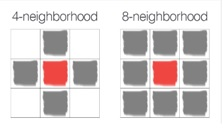

In [3]:
# Visualize the structuring element
image = cv2.imread("SE.jpg")
cv2_imshow(image)

## Types of morphological operations:

1.	Erosion
2.	Dilation
3.	Opening
4.	Morphological gradient
5.	Black hat
6.	Top hat (or "White hat")

### Erosion:

Just like water rushing along a river bank erodes the soil, an erosion in an image “erodes” the foreground object and makes it smaller.

Simply put, pixels near the boundary of an object in an image will be discarded, “eroding” it away.

Erosion works by defining a structuring element and then sliding this structuring element from left-to-right and top-to-bottom across the input image.

A foreground pixel in the input image will be kept only if ALL pixels inside the structuring element are > 0. Otherwise, the pixels are set to 0 (i.e. background).

Erosion is useful for removing small blobs in an image or disconnecting two connected objects.

We can perform erosion by using the cv2.erode function.

### Dilation:

The opposite of an erosion is a dilation.

Just like an erosion will eat away at the foreground pixels, a dilation will grow the foreground pixels.

Dilations increase the size of foreground object and are especially useful for joining broken parts of an image together.

Dilations, just as an erosion, also utilize structuring elements — a center pixel p of the structuring element is set to white if ANY pixel in the structuring element is > 0.

We apply dilations using the cv2.dilate function.

### Opening:

An opening is an erosion followed by a dilation.

Performing an opening operation allows us to remove small blobs from an image: first an erosion is
applied to remove the small blobs, then a dilation is applied to regrow the size of the original object.

### Closing:

The exact opposite to an opening would be a closing.

A closing is a dilation followed by an erosion.

As the name suggests, a closing is used to close holes inside of objects or for connecting components together.

Performing the closing operation is again accomplished by making a call to cv2.morphologyEx, but this time we are going to indicate that our morphological operation is a closing by specifying the cv2.MORPH_CLOSE flag.

### Morphological Gradient:

A morphological gradient is the difference between the dilation and erosion.

It is useful for determining the outline of a particular object of an image.

### Top Hat/White Hat:

A top hat (also known as a white hat) morphological operation is the difference between the original input image and the opening.

A top hat operation is used to reveal bright regions of an image on dark backgrounds.

Up until this point we have only applied morphological operations to binary images.

But we can also apply morphological operations to grayscale images as well.

In fact, both the top hat/white hat and the black hat operators are more suited for grayscale images rather than binary ones.

### Black Hat:

The black hat operation is the difference between the closing of the input image and the input image itself.

In fact, the black hat operator is simply the opposite of the white hat operator.

Saving Sample_without_Noise.jpg to Sample_without_Noise.jpg


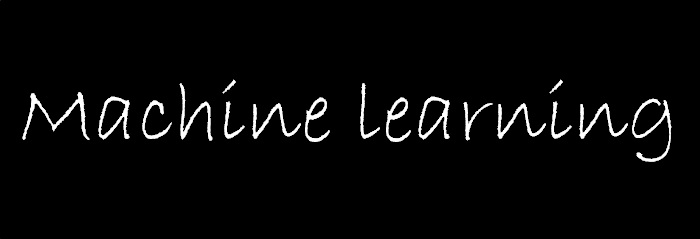

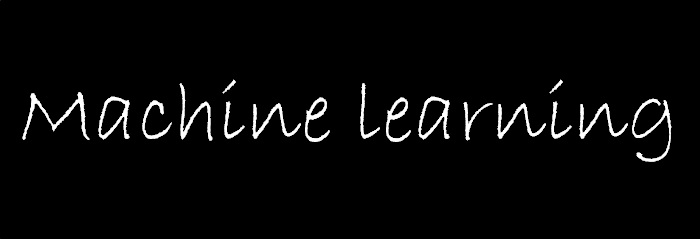

In [4]:
# load the input image (Sample_without_Noise.jpg) and convert it to grayscale
input_image = files.upload()
image = cv2.imread("Sample_without_Noise.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow(image)
print("\n")
cv2_imshow(gray)

Original Image


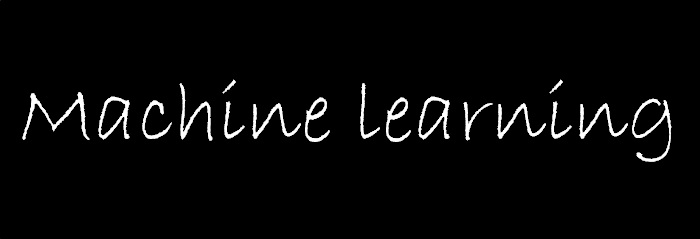



Eroded 1


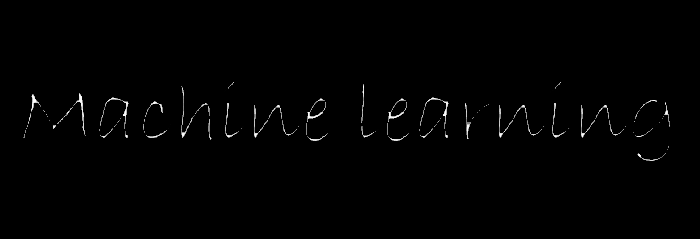



Eroded 2


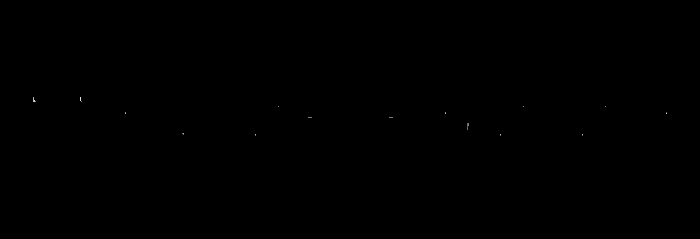



Eroded 3


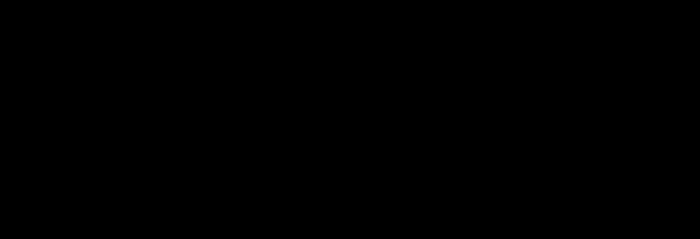

In [5]:
# apply a series of erosions
# The for loop controls the number of times, or iterations, we are going to apply the erosion.
# As the number of erosions increases, the foreground logo will start to “erode” and disappear.
# The cv2.erode function takes two required arguments and a third optional one.
# The first argument is the image that we want to erode — in this case, it’s our binary.
# The second argument to is the structuring element. If this value is None, then a 3x3
# structuring element, identical to the 8-neighborhood structuring element will be used.
# Of course, you could supply your own custom structuring element here instead of None.
# The last argument is the number of the erosion is going to be performed.
# Show the original image
print("Original Image")
cv2_imshow(image)
print("\n")

for i in range(0, 3):
	eroded = cv2.erode(gray.copy(), None, iterations=i + 1)
	print("Eroded {}".format(i+1))
	cv2_imshow(eroded)
	print("\n")

Original Image


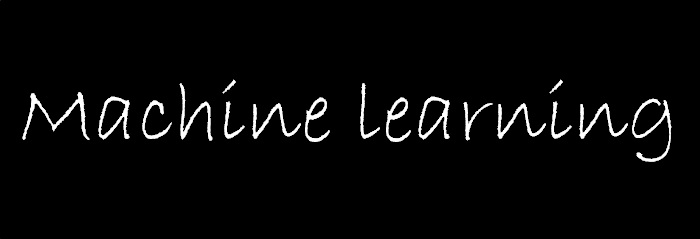



Dilated 1


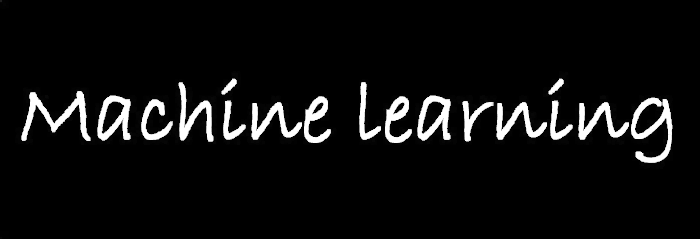



Dilated 2


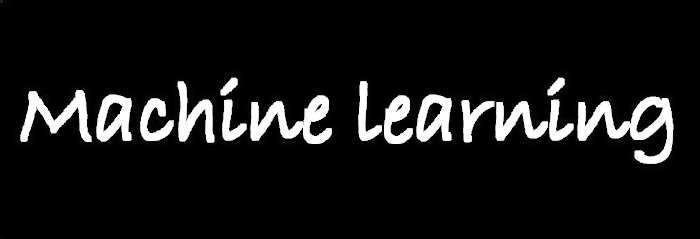



Dilated 3


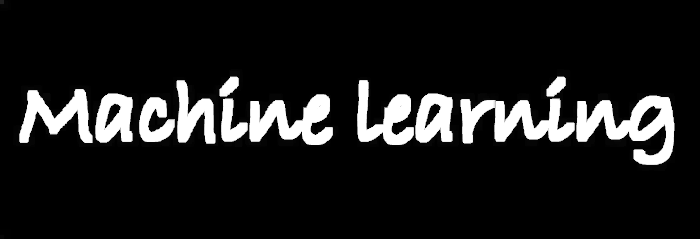

In [6]:
# apply a series of dilations
# In cv2.dilate function, the first argument is the image we want to dilate; the second is our
# structuring element, which when set to None is a 3x3 8-neighborhood structuring element
# the final argument is the number of dilation we are going to apply.
print("Original Image")
cv2_imshow(image)
print("\n")

for i in range(0, 3):
	dilated = cv2.dilate(gray.copy(), None, iterations=i + 1)
	print("Dilated {}".format(i+1))
	cv2_imshow(dilated)
	print("\n")

Original Image


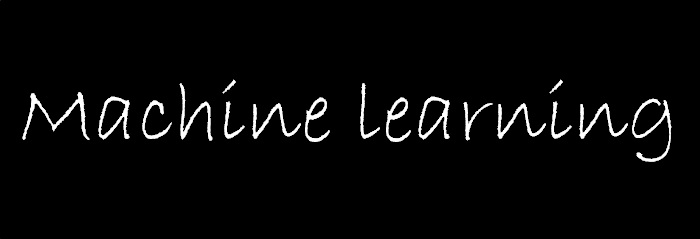



Opening: (3, 3)


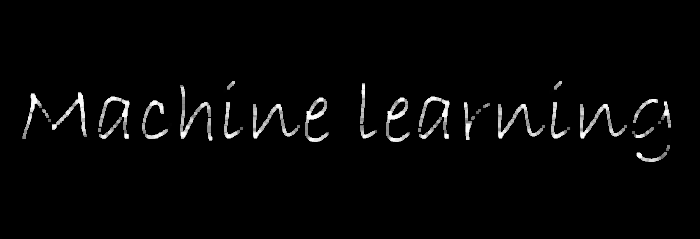



Opening: (5, 5)


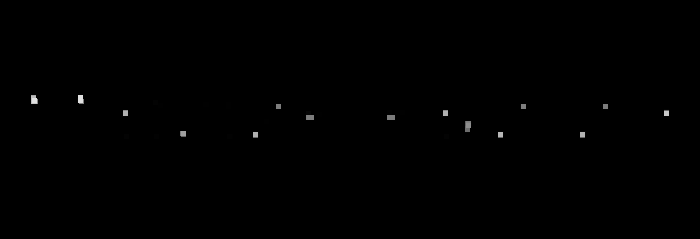



Opening: (7, 7)


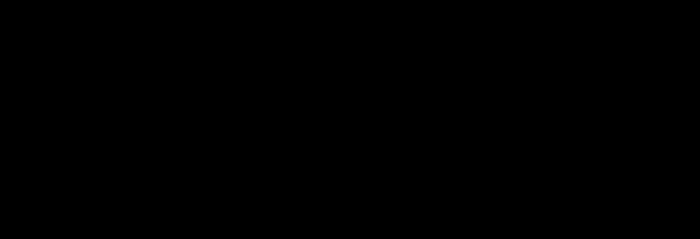

In [7]:
kernelSizes = [(3, 3), (5, 5), (7, 7)]

# loop over the kernels and apply an "opening" operation to the image
# The cv2.getStructuringElement function requires two arguments: the first is the type of
# structuring element (rectangular-cv2.MORPH_RECT or cross shape-cv2.MORPH_CROSS,
# circular structuring element- cv2.MORPH_ELLIPSE) and the second is the size of the
# structuring element
print("Original Image")
cv2_imshow(image)
print("\n")

for kernelSize in kernelSizes:
	kernel = cv2.getStructuringElement(cv2.MORPH_RECT, kernelSize)
	opening = cv2.morphologyEx(gray, cv2.MORPH_OPEN, kernel)
	print("Opening: ({}, {})".format(kernelSize[0], kernelSize[1]))
	cv2_imshow(opening)
	print("\n")

Original Image


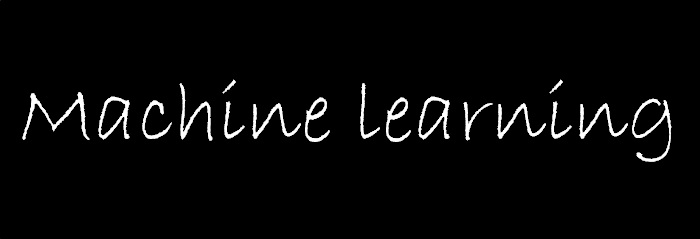



Closing: (3, 3)


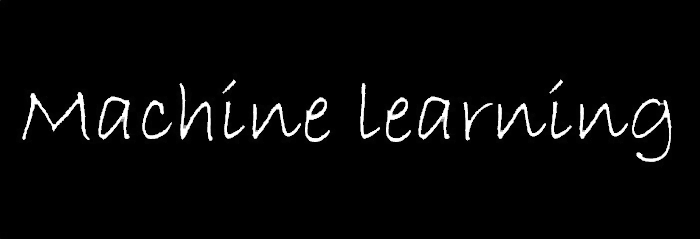



Closing: (5, 5)


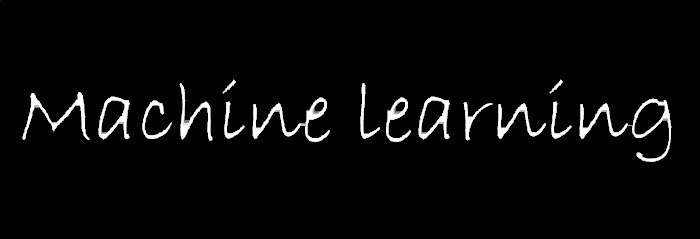



Closing: (7, 7)


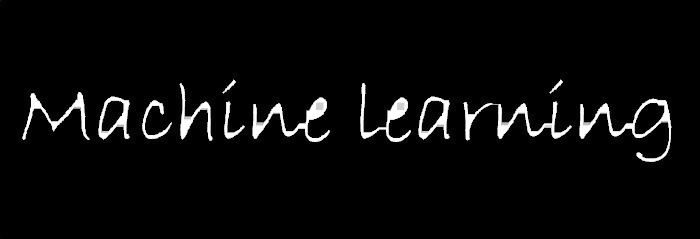

In [8]:
print("Original Image")
cv2_imshow(image)
print("\n")

# loop over the kernels and apply a "closing" operation to the image
for kernelSize in kernelSizes:
	kernel = cv2.getStructuringElement(cv2.MORPH_RECT, kernelSize)
	closing = cv2.morphologyEx(gray, cv2.MORPH_CLOSE, kernel)
	print("Closing: ({}, {})".format(kernelSize[0], kernelSize[1]))
	cv2_imshow(closing)
	print("\n")

Original Image


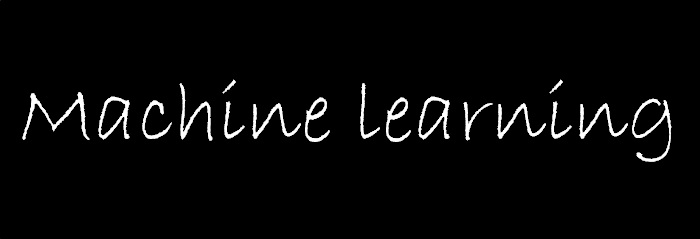



Gradient: (3, 3)


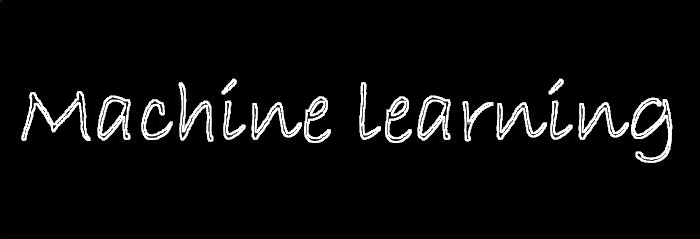



Gradient: (5, 5)


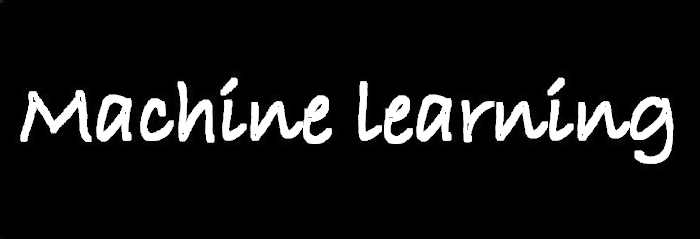



Gradient: (7, 7)


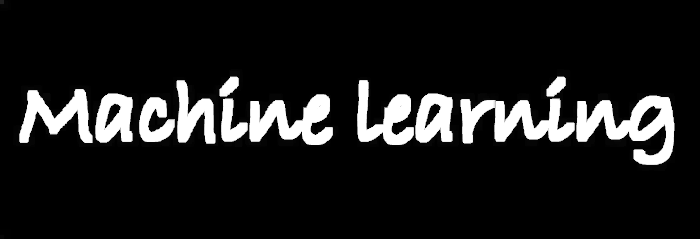

In [9]:
print("Original Image")
cv2_imshow(image)
print("\n")

# loop over the kernels and apply a "morphological gradient" operation to the image
for kernelSize in kernelSizes:
	kernel = cv2.getStructuringElement(cv2.MORPH_RECT, kernelSize)
	gradient = cv2.morphologyEx(gray, cv2.MORPH_GRADIENT, kernel)
	print("Gradient: ({}, {})".format(kernelSize[0], kernelSize[1]))
	cv2_imshow(gradient)
	print("\n")

In [10]:
car_image = files.upload()

Saving car.png to car.png


Original Image


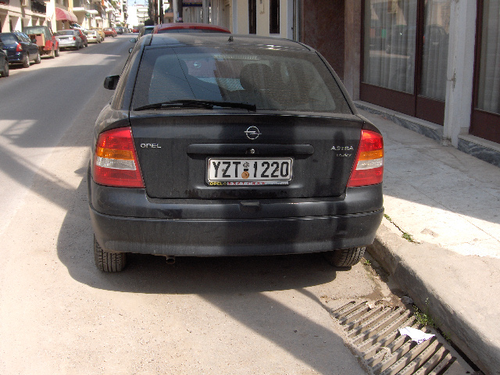



Blackhat Filtered Image


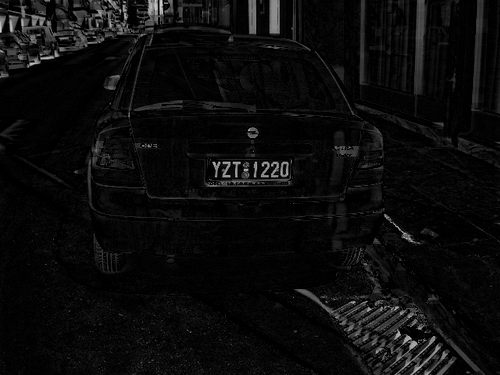



White Hat Filtered Image


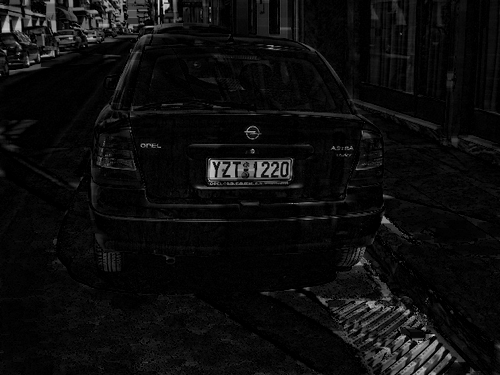

In [11]:
# load the image and convert it to grayscale
image1 = cv2.imread("car.png")
gray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)

# construct a rectangular kernel (w, h) and apply a blackhat operation which enables us to find
# dark regions on a light background
rectKernel = cv2.getStructuringElement(cv2.MORPH_RECT, (13, 5))
blackhat = cv2.morphologyEx(gray1, cv2.MORPH_BLACKHAT, rectKernel)

# similarly, a tophat (also called a "whitehat") operation will enable us to find light regions on a
# dark background
tophat = cv2.morphologyEx(gray1, cv2.MORPH_TOPHAT, rectKernel)

# show the output images (tophat-light against dark background are clearly displayed)
# (blackhat-dark against light background are clearly displayed)
print("Original Image")
cv2_imshow(image1)
print("\n")
print("Blackhat Filtered Image")
cv2_imshow(blackhat)
print("\n")
print("White Hat Filtered Image")
cv2_imshow(tophat)
print("\n")